# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import pandas as pd
import pymatgen as mg
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

# Set up constants

In [3]:
PROCESSED_PATH = "../data/processed/IMT_Classification_Dataset_Processed_v9.xlsx"
METRICS_PATH = "../data/processed/model_metrics_comparison_with_raw.xlsx"
SAVE_PATH = "../plots/"
SAVE_PLOT = True

# Define some helper functions

In [4]:
def return_num_elem(compound_name):
    """Return the number of elements in a compound as one of 'binary', 'ternary', 'quarternary'"""
    num_elems_str = "Other"
    num_elems = len(mg.Composition(compound_name).elements) 
    if num_elems == 2:
        num_elems_str = "Binary"
    elif num_elems == 3:
        num_elems_str = "Ternary"
    elif num_elems == 4:
        num_elems_str = "Quarternary"
    return num_elems_str


def autolabel(ax):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=24)

# Read in data

In [5]:
df_plot = pd.read_excel(PROCESSED_PATH)
df_plot = df_plot.replace({"Label": {0: "Metal", 1: "Insulator", 2: "MIT"}})

In [6]:
df_plot

Compound  Label                                   struct_file_path  \
0          BaMoO3  Metal        ../data/Structures/Metals/BaMoO3_291573.cif   
1          BaNiS2  Metal        ../data/Structures/Metals/BaNiS2_246945.cif   
2          BaOsO3  Metal      ../data/Structures/Metals/BaOsO3-Springer.cif   
3        Bi2Ru2O7  Metal       ../data/Structures/Metals/Bi2Ru2O7_73787.cif   
4        Ca3Ru2O7  Metal             ../data/Structures/Metals/Ca3Ru2O7.cif   
..            ...    ...                                                ...   
223         V6O13    MIT  ../data/Structures/MIT_materials/HighT/V6O13_H...   
224         V8O15    MIT  ../data/Structures/MIT_materials/HighT/V8O15_H...   
225           VO2    MIT  ../data/Structures/MIT_materials/HighT/VO2_HT_...   
226         YNiO3    MIT  ../data/Structures/MIT_materials/HighT/YNiO3-6...   
227  YbFe4(CuO4)3    MIT  ../data/Structures/MIT_materials/HighT/YbCu3Fe...   

     maximum_MendeleevNumber  range_MendeleevNumber  avg_dev_MendeleevNumber  \
0                         87                     78                27.600000   
1                         88                     79                26.500000   
2                         87                     78                25.920000   
3                         87                     31                 9.157025   
4                         87                     80                29.361111   
..                       ...                    ...                      ...   
223                       87                     41                17.717452   
224                       87                     41                18.601134   
225                       87                     41                18.222222   
226                       87                     75                24.240000   
227                       87                     48                14.700000   

     range_AtomicWeight  mean_AtomicWeight  avg_dev_AtomicWeight  \
0             121.32760          56.257040             48.309168   
1             105.26200          65.037600             36.144700   
2             174.23060          75.111040             70.933968   
3             192.98100          66.554236             64.342519   
4              85.07060          36.197483             23.564431   
..                  ...                ...                   ...   
223            34.94210          27.033747             15.099633   
224            34.94210          28.153174             15.852749   
225            34.94210          27.646767             15.529822   
226            72.90645          39.119490             27.744108   
227           157.05460          38.953240             27.544608   

     mode_AtomicWeight  ...  max_xx_dists  min_xx_dists  avg_xx_dists  \
0              15.9994  ...      2.857256      2.857256      2.857256   
1              32.0650  ...      3.783737      3.137645      3.654519   
2              15.9994  ...      3.100000      2.893540      2.978994   
3              15.9994  ...      3.691300      2.717536      3.077187   
4              15.9994  ...      3.488882      2.740999      2.933553   
..                 ...  ...           ...           ...           ...   
223            15.9994  ...      3.269140      2.461773      2.767633   
224            15.9994  ...      3.474319      2.529565      2.819850   
225            15.9994  ...      2.725617      2.575183      2.675472   
226            15.9994  ...      3.184308      2.736503      2.827539   
227            15.9994  ...      2.924013      2.552849      2.744642   

           v_m        v_x         iv       iv_p1  est_hubbard_u  \
0   -44.108215  23.006209  40.330000   54.417000      10.523409   
1   -21.082598  20.132993  18.168838   35.187000      12.893512   
2   -36.659700  22.481523  41.000000   55.000000       8.412244   
3   -47.298875  24.715398  45.000000   59.000000      10.043255   
4   -43.378203  25.385677  45.000000   59.000000      10.277936   
.. 

# Plot the number of element distribution within each class

In [7]:
df_plot["num_elem"] = df_plot["Compound"].apply(return_num_elem)

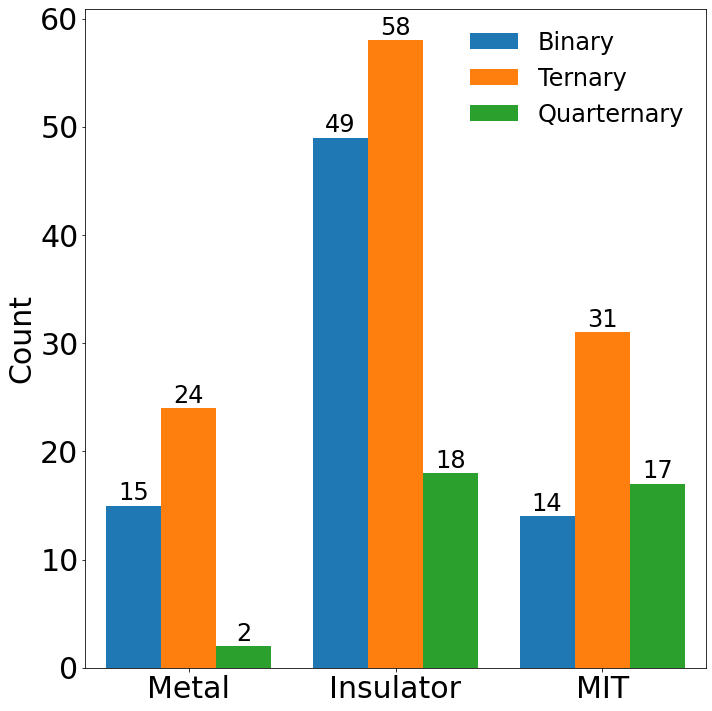

In [8]:
plt.figure(figsize=(10,10))
class_dist = sns.countplot(data=df_plot, x="Label", hue="num_elem", hue_order=["Binary", "Ternary", "Quarternary"],
                           saturation=1)
autolabel(class_dist)
class_dist.set_xlabel(None)
class_dist.set_ylabel("Count", fontsize=30)
class_dist.tick_params(labelsize=30)
class_dist.legend(fontsize=24, frameon=False)
plt.tight_layout()

In [9]:
if SAVE_PLOT: class_dist.figure.savefig(SAVE_PATH + "class_distribution_new.pdf", dpi=300, bbox_inches="tight")

# Plot the estimated charge transfer energy vs. estimate Hubbard U

In [10]:
x_plot = "est_charge_trans"
y_plot = "est_hubbard_u"
# get the relevant columns from the training set
df_charge_transfer_hubbard_plot = df_plot[["Compound", "Label", x_plot, y_plot]]
df_charge_transfer_hubbard_plot

Compound  Label  est_charge_trans  est_hubbard_u
0          BaMoO3  Metal         11.946426      10.523409
1          BaNiS2  Metal         21.595766      12.893512
2          BaOsO3  Metal          3.591515       8.412244
3        Bi2Ru2O7  Metal         11.876142      10.043255
4        Ca3Ru2O7  Metal          8.827434      10.277936
..            ...    ...               ...            ...
223         V6O13    MIT        -12.467020      58.592940
224         V8O15    MIT         11.940681      13.875184
225           VO2    MIT          9.779242      14.484546
226         YNiO3    MIT         10.393278      15.898371
227  YbFe4(CuO4)3    MIT          7.361181      16.597335

[228 rows x 4 columns]

In [11]:
charge_trans_min, charge_trans_max = 0, 21
hubbard_u_min, hubbard_u_max = 0, 30

In [12]:
print("Percentage of points plotted: :{:0.2f}%".format(
df_charge_transfer_hubbard_plot.loc[((df_charge_transfer_hubbard_plot.est_charge_trans >= charge_trans_min) & 
                                     (df_charge_transfer_hubbard_plot.est_charge_trans <= charge_trans_max)) &
                                    ((df_charge_transfer_hubbard_plot.est_hubbard_u >= hubbard_u_min) &
                                     (df_charge_transfer_hubbard_plot.est_hubbard_u <= hubbard_u_max))].shape[0] / df_charge_transfer_hubbard_plot.shape[0] * 100
    )
)

Percentage of points plotted: :78.95%


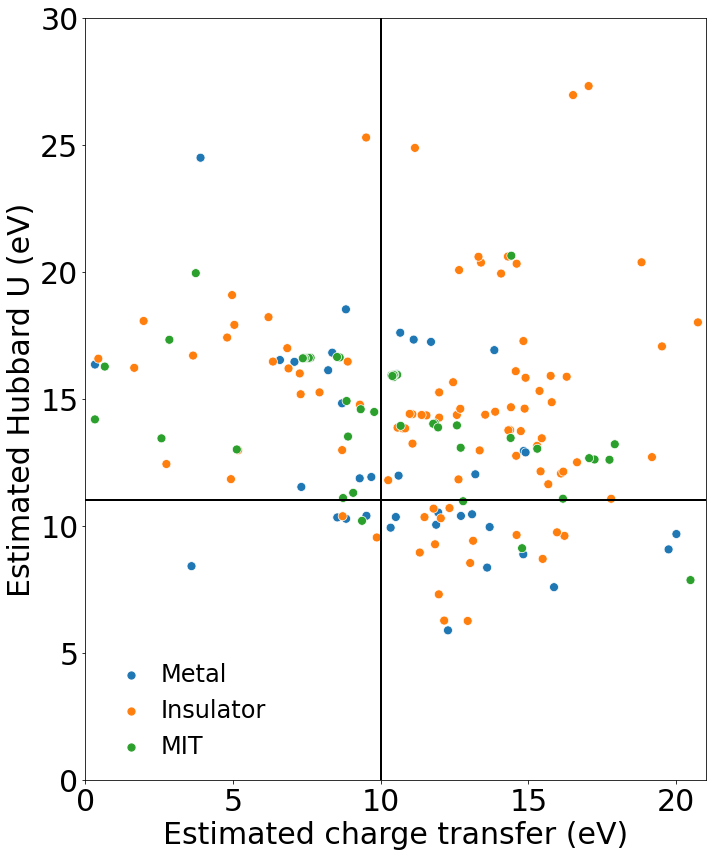

In [13]:
plt.figure(figsize=(10,12))
charge_hubbard = sns.scatterplot(data=df_charge_transfer_hubbard_plot, x=x_plot, y=y_plot, hue="Label", s=80)
charge_hubbard.set_xlabel("Estimated charge transfer (eV)", fontsize=30)
charge_hubbard.set_ylabel("Estimated Hubbard U (eV)", fontsize=30)
charge_hubbard.set_xlim(charge_trans_min, charge_trans_max)
charge_hubbard.set_ylim(hubbard_u_min, hubbard_u_max)
charge_hubbard.axvline(10, color='k', linestyle='-', linewidth=2)
charge_hubbard.axhline(11, color='k', linestyle='-', linewidth=2)
charge_hubbard.legend(loc='lower left', fontsize=24, markerscale=1.2, frameon=False, handletextpad=0.25)
charge_hubbard.tick_params(labelsize=30)
plt.tight_layout()

In [14]:
if SAVE_PLOT: charge_hubbard.figure.savefig(SAVE_PATH + "torrance_features_new.pdf", dpi=300, bbox_inches="tight")

# Plot the Range Mendeleev Number vs. the Average Deviation of the Covalent Radius

In [15]:
x_plot = "range_MendeleevNumber"
y_plot = "avg_dev_CovalentRadius"
# get the relevant columns from the training set
df_mendeleev_cov_radius_plot = df_plot[["Compound", "Label", x_plot, y_plot]]
df_mendeleev_cov_radius_plot

Compound  Label  range_MendeleevNumber  avg_dev_CovalentRadius
0          BaMoO3  Metal                     78               56.880000
1          BaNiS2  Metal                     79               38.875000
2          BaOsO3  Metal                     78               54.480000
3        Bi2Ru2O7  Metal                     31               37.487603
4        Ca3Ru2O7  Metal                     80               47.638889
..            ...    ...                    ...                     ...
223         V6O13    MIT                     41               37.595568
224         V8O15    MIT                     41               39.470699
225           VO2    MIT                     41               38.666667
226         YNiO3    MIT                     75               43.680000
227  YbFe4(CuO4)3    MIT                     48               34.980000

[228 rows x 4 columns]

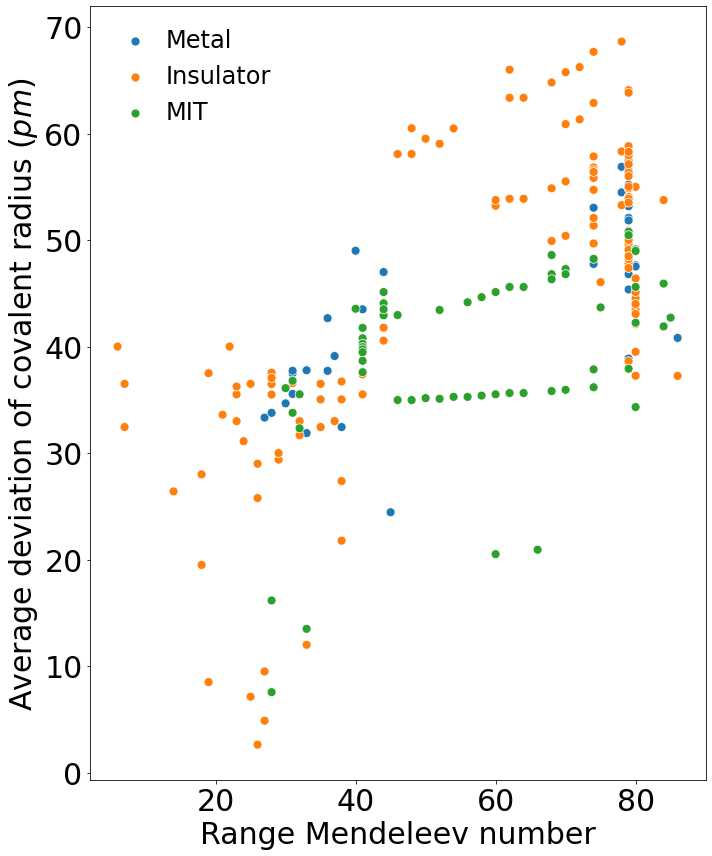

In [16]:
plt.figure(figsize=(10,12))
mendeleev_cov_radius = sns.scatterplot(data=df_mendeleev_cov_radius_plot, x=x_plot, y=y_plot, hue="Label", s=80)
mendeleev_cov_radius.set_xlabel("Range Mendeleev number", fontsize=30)
mendeleev_cov_radius.set_ylabel("Average deviation of covalent radius ($pm$)", fontsize=30)
mendeleev_cov_radius.legend(loc='upper left', fontsize=24, markerscale=1.2, frameon=False, handletextpad=0.25)
mendeleev_cov_radius.tick_params(labelsize=30)
plt.tight_layout()

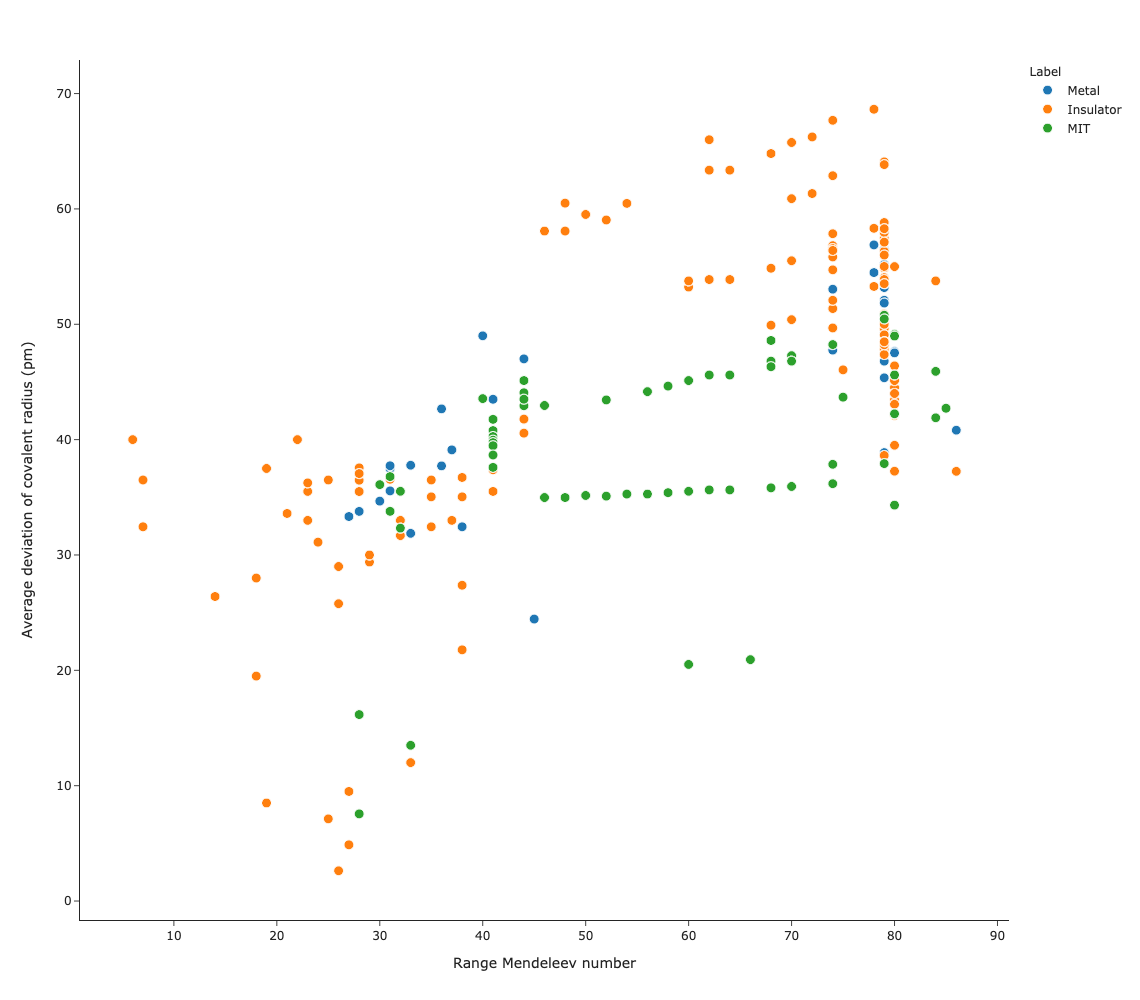

In [17]:
mendeleev_cov_radius_fig = px.scatter(df_plot, x=x_plot, y=y_plot, hover_name="Compound", 
                                      height=1000, width=1000, color="Label", template="simple_white",
                                      labels={
                                          x_plot: "Range Mendeleev number",
                                          y_plot: "Average deviation of covalent radius (pm)"
                                      })
mendeleev_cov_radius_fig.update_traces(mode='markers', marker_line_width=1, marker_size=10, marker_line_color="white")
mendeleev_cov_radius_fig.show()
mendeleev_cov_radius_fig.write_html(SAVE_PATH + "class_separation_interactive.html")

In [18]:
if SAVE_PLOT: mendeleev_cov_radius.figure.savefig(SAVE_PATH + "class_separation_new.pdf", dpi=300, bbox_inches="tight")

# Pairplot of 10 most important features for the MIT vs. non-MIT model

In [19]:
# handpicked ones
features_to_include = ["Label", # used for color coding
                       "gii",
                       "avg_dev_CovalentRadius",
                       "avg_mm_dists",
                       "avg_dev_GSmagmom",
                       "ewald_energy",
                       "est_hubbard_u",
                       "min_relative_bond_length",
                       "avg_dev_MendeleevNumber",
                       "range_MendeleevNumber",
                       "est_charge_trans"]

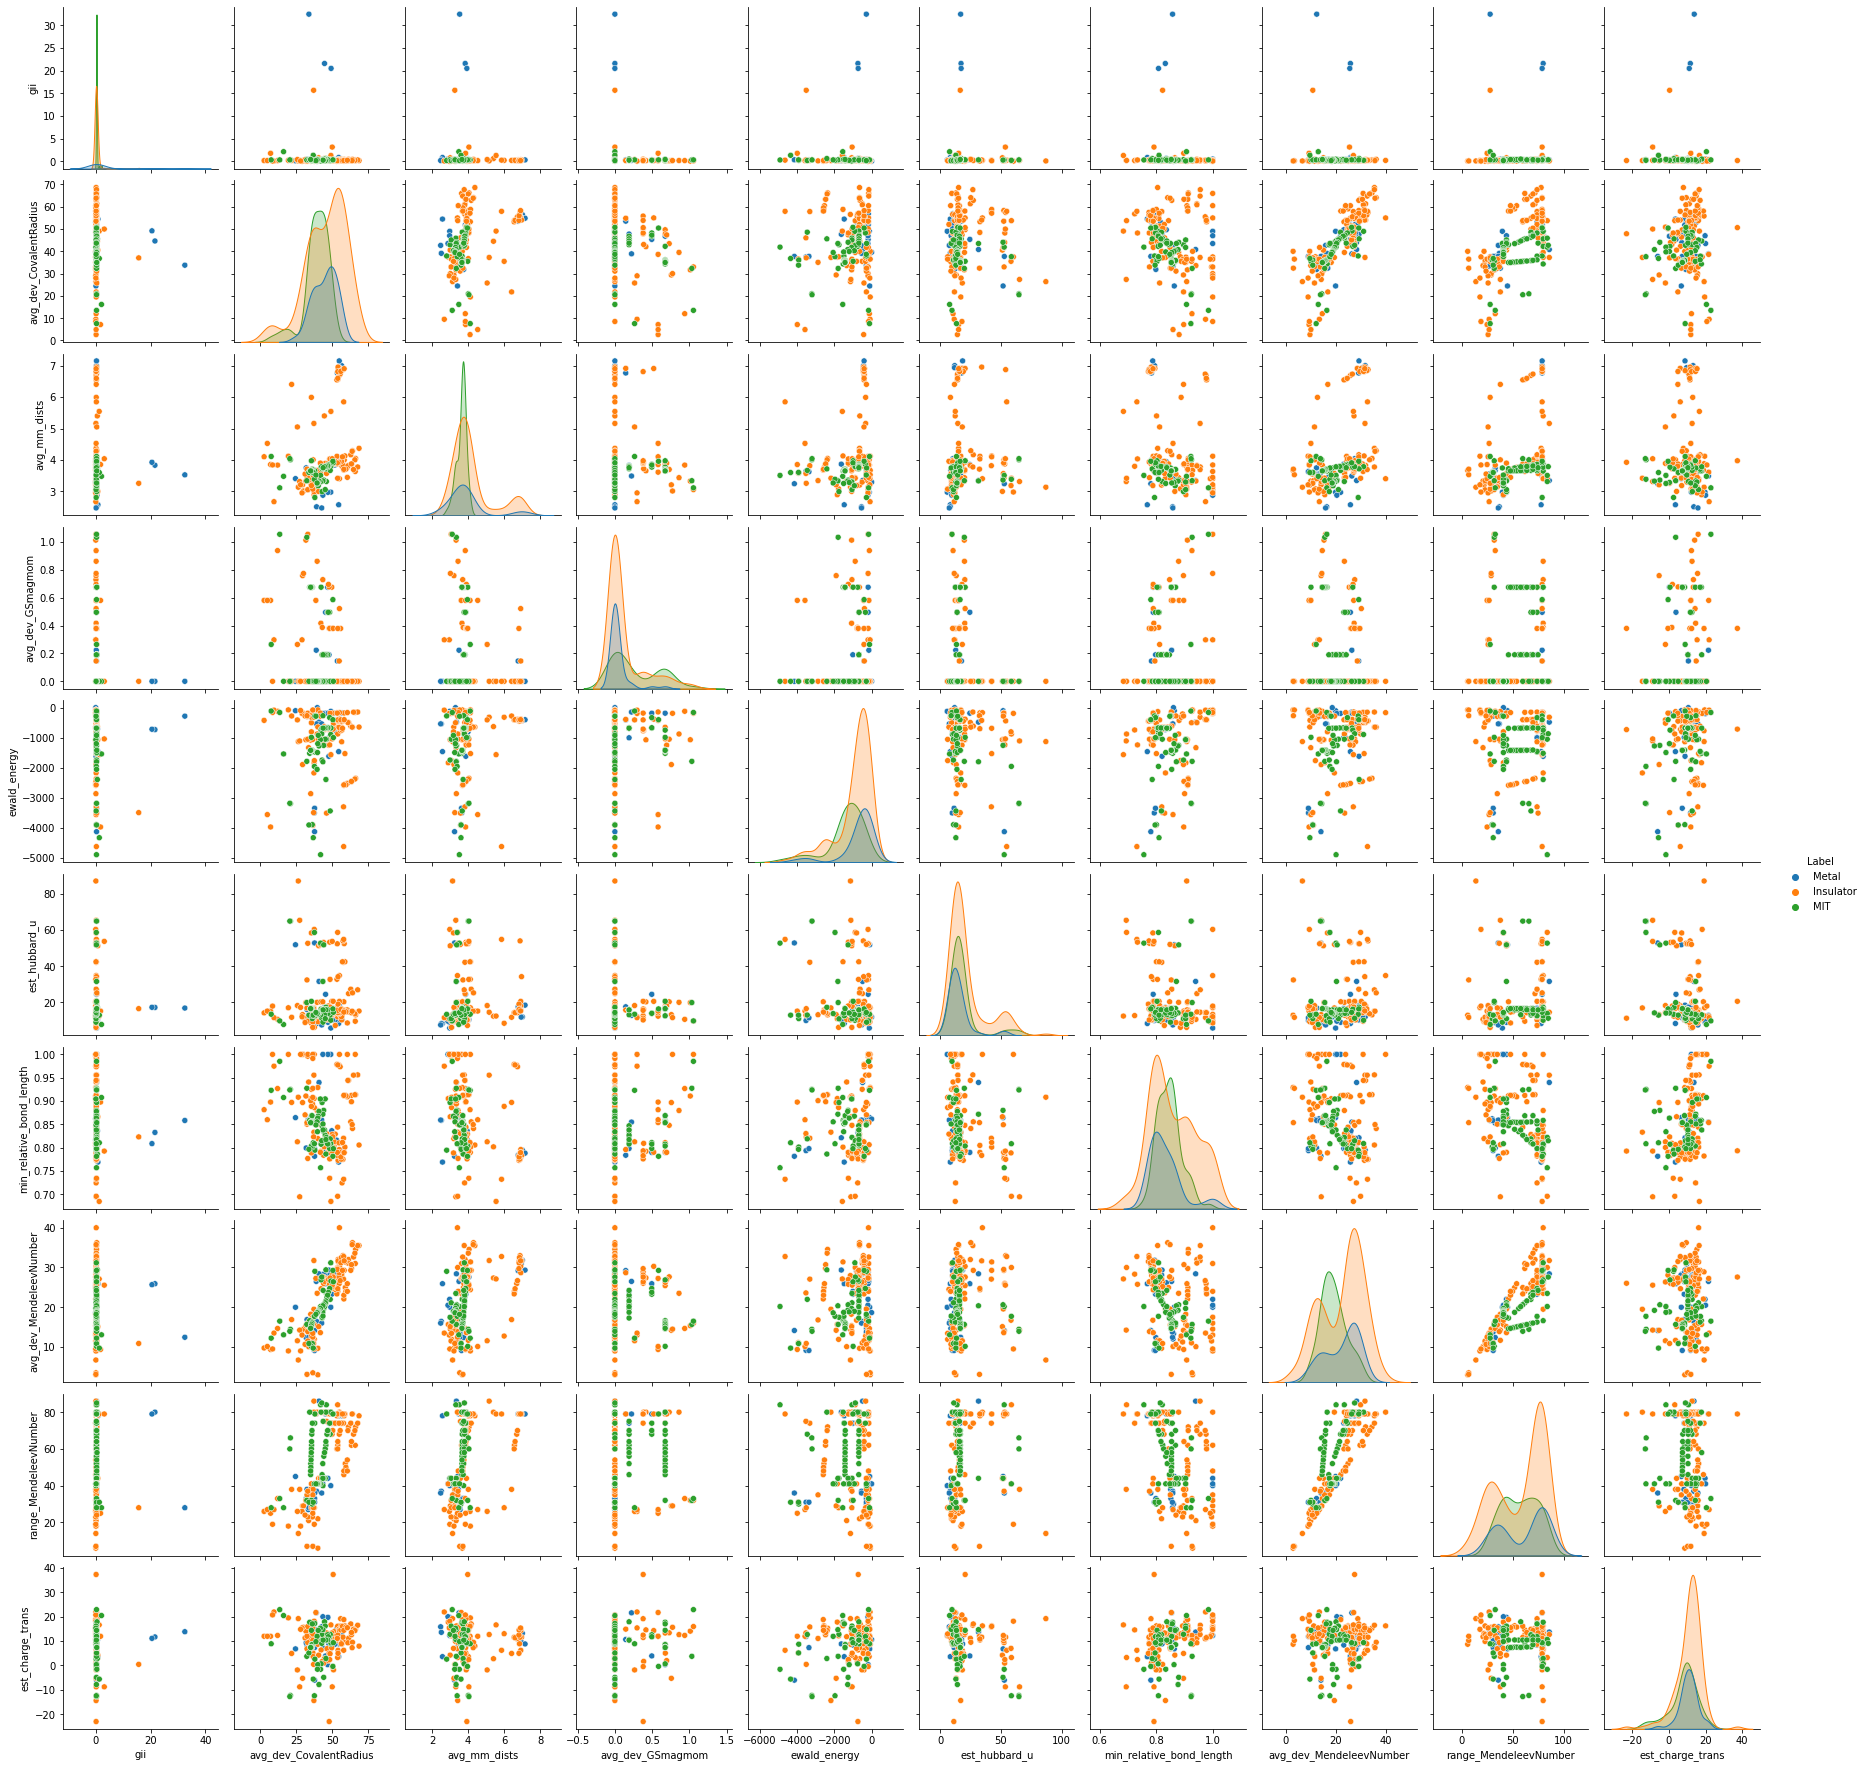

In [20]:
sns.pairplot(df_plot[features_to_include], hue="Label")

In [21]:
# ones selected based on SHAP values from the MIT classifier
features_to_include = ["Label", 
                       'gii',
                       'ewald_energy',
                       'avg_dev_GSvolume_pa',
                       'avg_dev_CovalentRadius',
                       'mean_GSvolume_pa',
                       'avg_dev_GSmagmom',
                       'mean_Electronegativity',
                       'avg_dev_MeltingT',
                       'avg_dev_neighbor_distance_variation',
                       'minimum_Electronegativity']

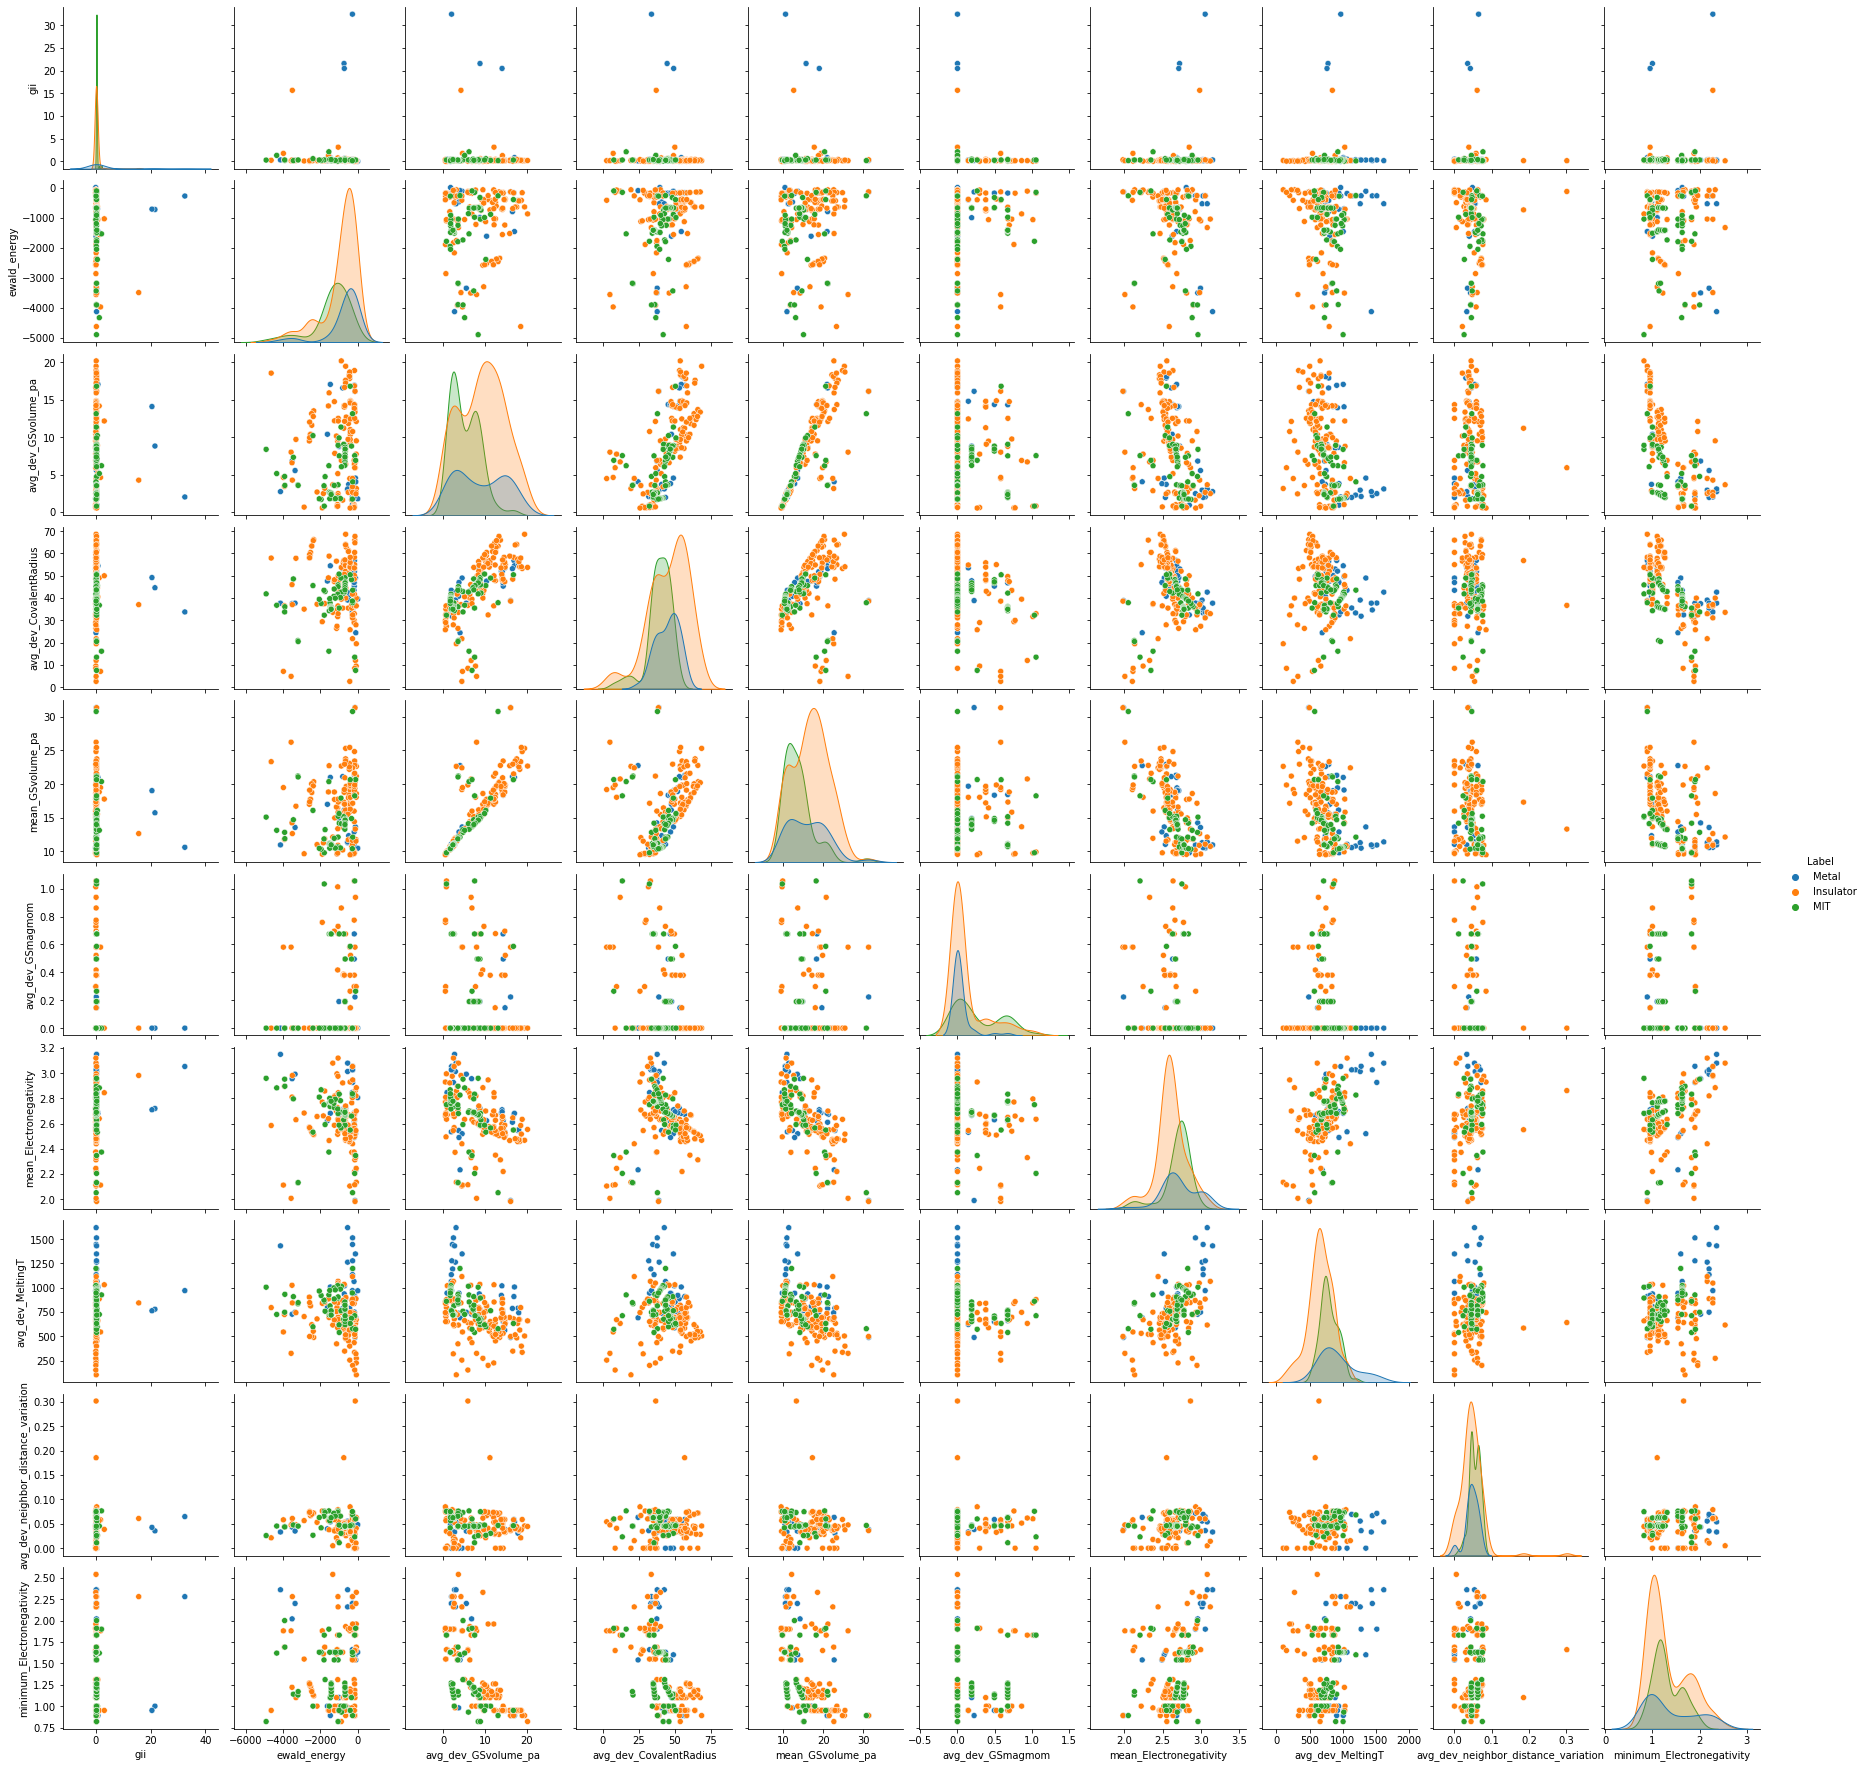

In [22]:
shap_features_pairwise_plot = sns.pairplot(df_plot[features_to_include], hue="Label")

In [23]:
if SAVE_PLOT: shap_features_pairwise_plot.fig.savefig(SAVE_PATH + "shap_features_pairwise_plot.pdf", dpi=300, bbox_inches="tight")

# Dataset summary plot

First define the subplot dataset and variables

In [24]:
df_metal = df_plot.loc[df_plot.Label == "Metal"]
df_insulator = df_plot.loc[df_plot.Label == "Insulator"]
df_mit = df_plot.loc[df_plot.Label == "MIT"]

x_metal, y_metal = "est_hubbard_u", "est_charge_trans"
x_insulator, y_insulator = "avg_xx_dists", "avg_mm_dists"
x_mit, y_mit = "avg_dev_CovalentRadius", "range_MendeleevNumber"

## Plotly figure for annotation

The interactive plots may not show up correctly without the plotly extension in JupyterLab.

### Metals

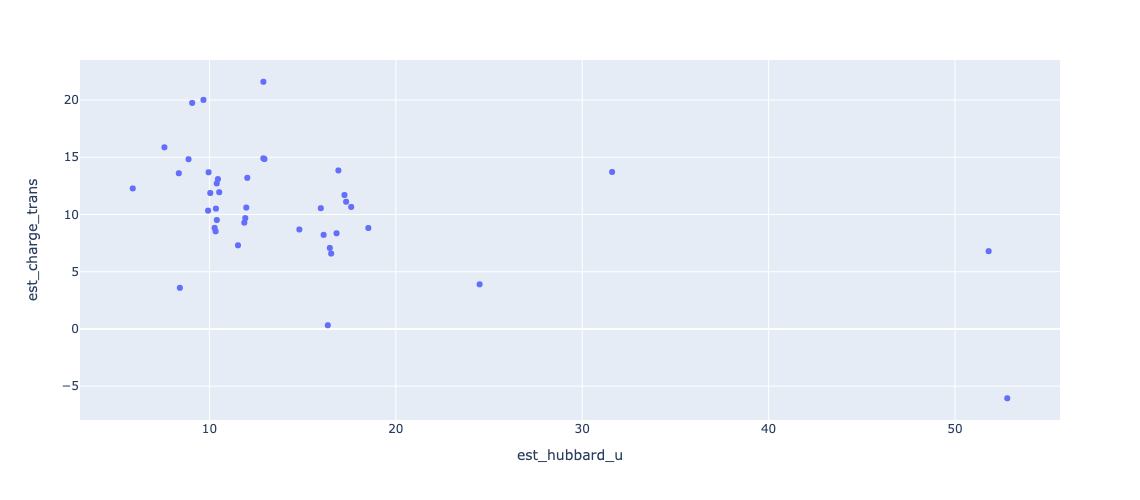

In [25]:
metal_fig = px.scatter(df_metal, x=x_metal, y=y_metal, hover_name="Compound", 
                       height=500, width=1000, hover_data=[df_metal.index])
metal_fig.show()

### Insulators

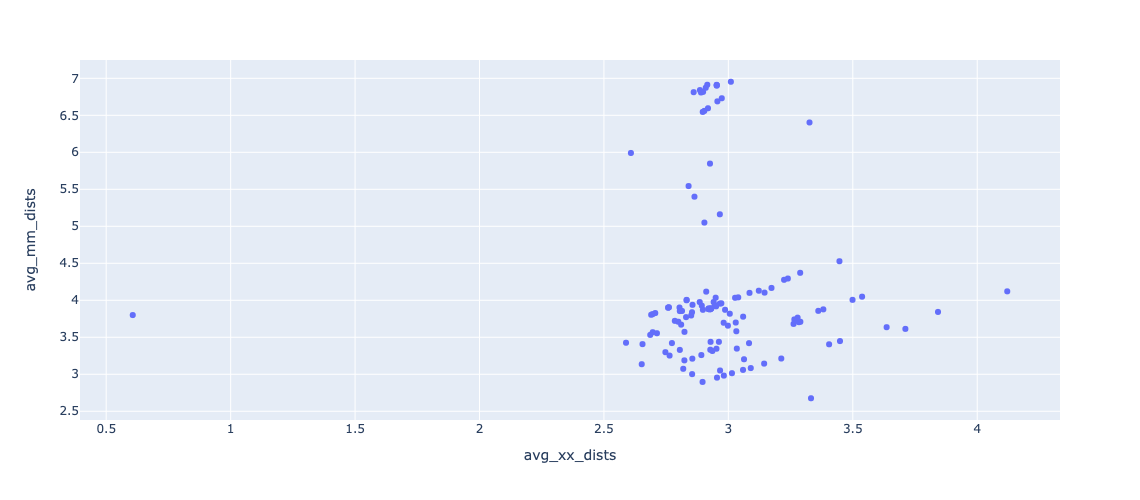

In [26]:
insulator_fig = px.scatter(df_insulator, x=x_insulator, y=y_insulator, hover_name="Compound", 
                           height=500, width=1000, hover_data=[df_insulator.index])
insulator_fig.show()

### MITs

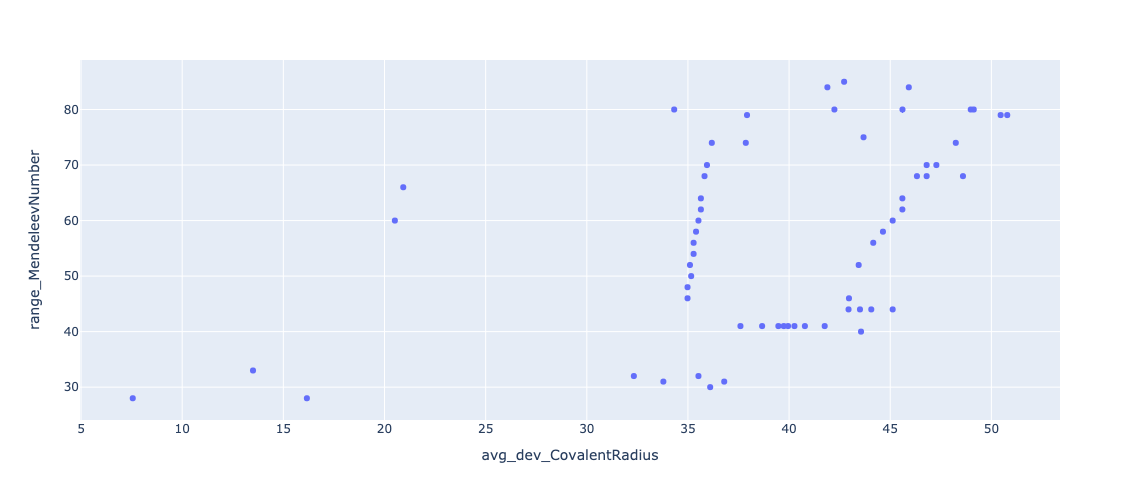

In [27]:
mit_fig = px.scatter(df_mit, x=x_mit, y=y_mit, hover_name="Compound", 
                     height=500, width=1000, hover_data=[df_mit.index])
mit_fig.show()

### Static image

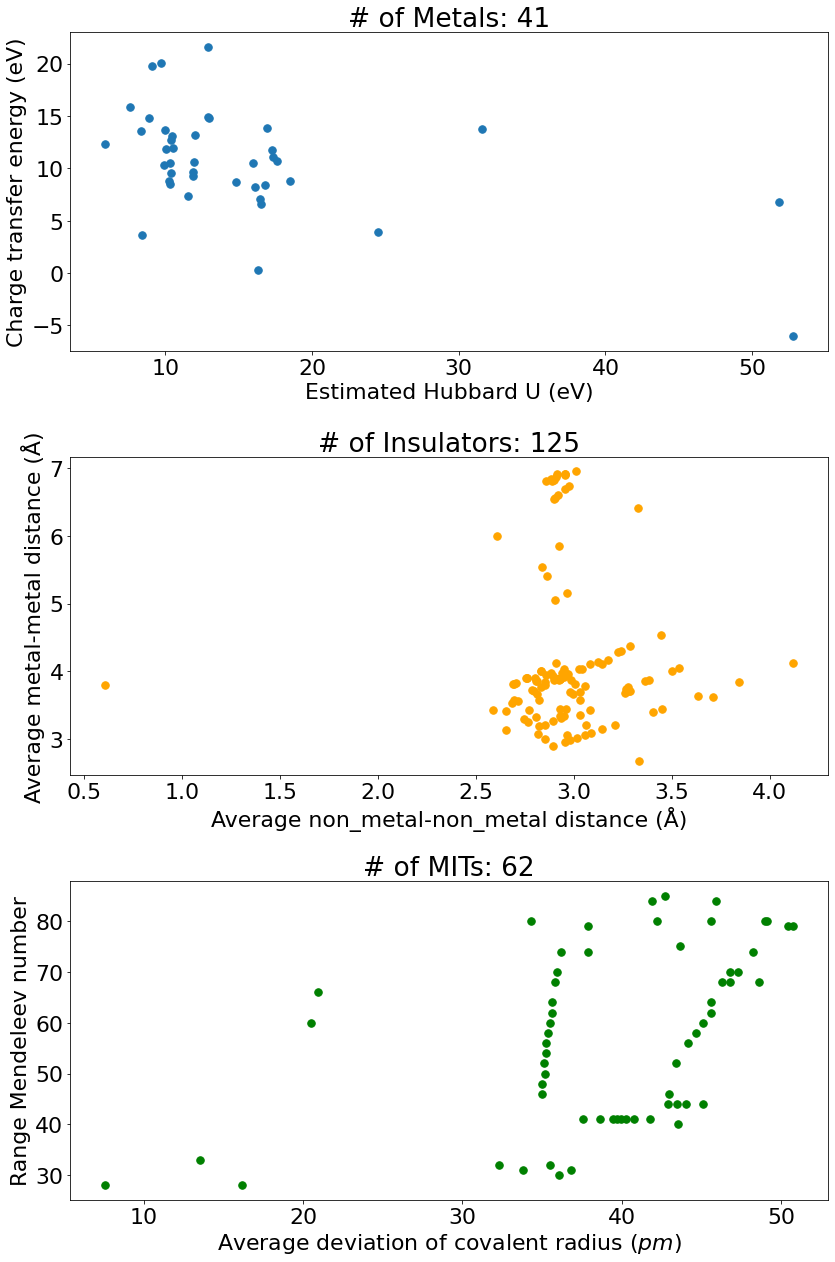

In [28]:
MARKERSIZE = 15
font = {'size': 22}
mpl.rc('font', **font)

summary_plot, ax = plt.subplots(3,1, figsize = (12, 18))

# metal subplot
ax[0].plot(df_metal[x_metal], df_metal[y_metal], ".", markersize = MARKERSIZE)
ax[0].set_xlabel("Estimated Hubbard U (eV)")
ax[0].set_ylabel("Charge transfer energy (eV)")
ax[0].set_title("# of Metals: {}".format(df_metal.shape[0]))

# insulator subplot
ax[1].plot(df_insulator[x_insulator], df_insulator[y_insulator], ".", color="orange", markersize = MARKERSIZE)
ax[1].set_xlabel("Average non_metal-non_metal distance (Å)")
ax[1].set_ylabel("Average metal-metal distance (Å)")
ax[1].set_title("# of Insulators: {}".format(df_insulator.shape[0]))

# mit subplot
ax[2].plot(df_mit[x_mit], df_mit[y_mit], ".", color="green", markersize = MARKERSIZE)
ax[2].set_xlabel("Average deviation of covalent radius ($pm$)")
ax[2].set_ylabel("Range Mendeleev number")
ax[2].set_title("# of MITs: {}".format(df_mit.shape[0]))

summary_plot.tight_layout()

In [29]:
if SAVE_PLOT: summary_plot.savefig(SAVE_PATH + "data_summary.pdf", dpi=300, bbox_inches="tight")

# Human vs. ML

## Read in ML metric data

In [30]:
df_ml_metrics = pd.read_excel(METRICS_PATH)
df_ml_metrics = df_ml_metrics.loc[(df_ml_metrics.model_type == "XGBClassifier") & 
                                  (df_ml_metrics.metric_name != "roc_auc") & 
                                  (df_ml_metrics.positive_class != "Multiclass")]
df_ml_metrics

model_type positive_class         metric_name  metric_value  \
0   XGBClassifier          Metal  precision_weighted      0.855847   
1   XGBClassifier          Metal     recall_weighted      0.857246   
3   XGBClassifier          Metal         f1_weighted      0.845803   
4   XGBClassifier      Insulator  precision_weighted      0.867475   
5   XGBClassifier      Insulator     recall_weighted      0.847826   
7   XGBClassifier      Insulator         f1_weighted      0.847466   
8   XGBClassifier            MIT  precision_weighted      0.844949   
9   XGBClassifier            MIT     recall_weighted      0.847826   
11  XGBClassifier            MIT         f1_weighted      0.845918   

    metric_dispersion                                         raw_metric  
0            0.007573  [0.8695652173913043, 0.8406349206349206, 0.856...  
1            0.021014  [0.8666666666666667, 0.8478260869565217, 0.847...  
3            0.013550  [0.843741765480896, 0.8355731225296441, 0.8158...  
4            0.022641  [0.8386749482401656, 0.8674749163879598, 0.847...  
5            0.016667  [0.8260869565217391, 0.8478260869565217, 0.847...  
7            0.014584  [0.8264163372859025, 0.8474663377531092, 0.847...  
8            0.029726  [0.8375388198757764, 0.8449488491048593, 0.871...  
9            0.033454  [0.8260869565217391, 0.8478260869565217, 0.869...  
11           0.032731  [0.8301408736191344, 0.8459182349123945, 0.869...

## Define a helper function to select ML metrics

In [31]:
def get_ml_metric(pos_class, df_input=df_ml_metrics):
    """A helper function to select the metric value and dispersion with the given positive class"""
    df_selected = df_input.loc[df_input.positive_class == pos_class]
    return df_selected.metric_value.to_list(), df_selected.metric_dispersion.to_list()

## Define plot constants

In [32]:
MIT_TITLE = "T"
METAL_TITLE = "M"
INSULATOR_TITLE = "I"
TITLES = [METAL_TITLE, INSULATOR_TITLE, MIT_TITLE]

TICK_SIZE = 19
BARWIDTH = 0.2
CAPSIZE = 5

In [33]:
human_index = [0.1, 0.6, 1.1]
ml_index = [0.3, 0.8, 1.3]

# Metal vs. non-Metal

In [34]:
# human metrics
# Precision, Recall, F1
metal_human = [0.44, 0.67, 0.5]
metal_human_IQR = [0.2, 0.34, 0.22]
# Divide the IQR into half to plot as error bars on the graph
metal_human_err = [i/2 for i in metal_human_IQR]

# ML metrics
metal_ml, metal_ml_IQR = get_ml_metric("Metal")
metal_ml_err = [i/2 for i in metal_ml_IQR]

## Insulator vs. non-Insulator

In [35]:
# human metrics
insulator_human = [0.44, 0.83, 0.57]
insulator_human_IQR = [0.25, 0.33, 0.25]
insulator_human_err = [i/2 for i in insulator_human_IQR]

# ML metrics
insulator_ml, insulator_ml_IQR = get_ml_metric("Insulator")
insulator_ml_err = [i/2 for i in insulator_ml_IQR]

## MIT vs. non-MIT

In [36]:
# human metrics
mit_human = [0.39, 0.67, 0.47]
mit_human_IQR = [0.18, 0.5, 0.25]
mit_human_err = [i/2 for i in mit_human_IQR]

# ML metrics
mit_ml, mit_ml_IQR = get_ml_metric("MIT")
mit_ml_err = [i/2 for i in mit_ml_IQR]

## Combine metrics

In [37]:
human = [metal_human, insulator_human, mit_human]
ml = [metal_ml, insulator_ml, mit_ml]

human_err = [metal_human_err, insulator_human_err, mit_human_err]
ml_err = [metal_ml_err, insulator_ml_err, mit_ml_err]

## Compare performance

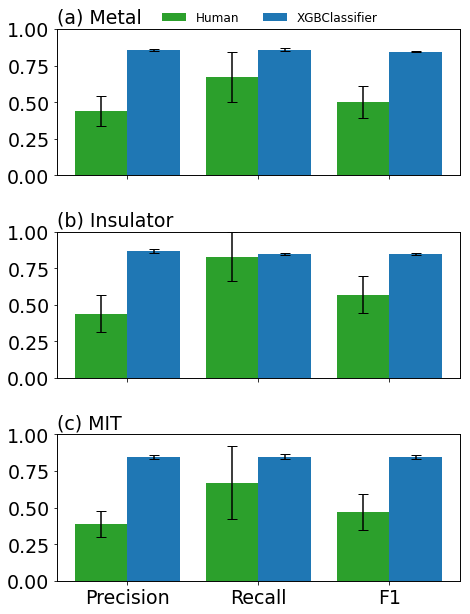

In [38]:
f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(7, 9))

# Plot the three subplots in the order of "Metal", "Insulator", "MIT"
for i in range(3):
    tit = ['(a) Metal', '(b) Insulator', '(c) MIT'][i]
    axarr[i].bar(human_index, human[i], width=BARWIDTH, yerr=human_err[i], color="#2ca02c", capsize=CAPSIZE)
    axarr[i].bar(ml_index, ml[i], width=BARWIDTH, yerr=ml_err[i], color="#1f77b4", capsize=CAPSIZE)
    if i == 0:
        axarr[i].set_ylim(0, 1.0)
        axarr[i].legend(('Human', 'XGBClassifier'), frameon=False, loc=(0.25, 1),
                        ncol=2, fontsize=12)
    axarr[i].tick_params(labelsize=TICK_SIZE)
    ax = axarr[i].twinx()
    axarr[i].set_yticks([0, 0.25, 0.5, 0.75, 1])
    plt.title(tit, loc='left', fontsize=TICK_SIZE)
    ax.set_yticks([])
    
f.subplots_adjust(hspace=0.1)
# Hide x labels and tick labels for all but bottom plot.
plt.xticks((0.2, 0.7, 1.2), ('Precision', 'Recall', 'F1'))
plt.tight_layout()

In [39]:
if SAVE_PLOT: f.savefig(SAVE_PATH + "human_ml_comparison.pdf", dpi=300, bbox_inches="tight")